<a href="https://colab.research.google.com/github/VasquezSRE/machinelearning-gtc/blob/main/algorithms/4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier
from numpy import random
from sklearn.model_selection import StratifiedKFold
from numpy import matlib
import qgrid
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import sys; sys.path.append('./Utils')
from utils import Utils

In [ ]:
ut = Utils()
X, Y = ut.get_matrixes()

In [ ]:
def MLP(nCaps, neuronCaps):
        #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    f1 = []
    gmean = []
    eficiencia_train = []
    eficiencia_test = []
    skf = StratifiedKFold(n_splits=Folds)
    for train, test in skf.split(X, Y):
        Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X=X, Y=Y, train=train, test=test)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = None;
        if(nCaps == 1):
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            mlp = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = (neuronCaps), activation = 'relu', max_iter=500), n_jobs=-1).fit(Xtrain, Ytrain)
        else:
            mlp = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = (neuronCaps, neuronCaps), activation = 'tanh', max_iter=500), n_jobs=-1).fit(Xtrain, Ytrain)

        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(mlp, Xtrain, Xtest, Ytrain, Ytest)
        
        f1.append(f1_score_current)
        gmean.append(gmean_current)
        eficiencia_train.append(eficiencia_train_current)
        eficiencia_test.append(eficiencia_test_current)
    
    f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic = ut.get_means_and_ic(f1, gmean, eficiencia_train, eficiencia_test)

    print(f"Finalizado: {nCaps} capas y {neuronCaps} neuronas por capa")
    
    return f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic

In [ ]:
randn = np.random.randn
df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3]),
    'Neuronas por capa' : pd.Series([20,24,28,32,36,100,188,20,24,28,32,36,100,188,20,24,28,32,36,100,188])})

In [ ]:
f1 = []
f1_ic = []
gmean =[]
gmean_ic = []
efi_test = []
efi_test_ic = []
efi_train = []
efi_train_ic = []
for e, i in zip(df_types['N. de capas ocultas'], df_types['Neuronas por capa']):
    f1_mean, f1_ic_, gmean_mean, gmean_ic_, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic = MLP(e, i)
    f1.append(f1_mean)
    f1_ic.append(f1_ic_)
    gmean.append(gmean_mean)
    gmean_ic.append(gmean_ic_)
    efi_test.append(eficiencia_test_mean)
    efi_test_ic.append(eficiencia_test_ic)
    efi_train.append(efi_train)
    efi_train_ic.append(efi_train_ic)
#maxi = np.array(meanPrueba).type()
#print(f'Mejor Modelo: {}')0
df_types["f1"] = f1
df_types["f1 IC"] = f1_ic
df_types["GMEAN"] = gmean
df_types["GMEAN IC"] = gmean_ic
df_types["Eficiencia Test"] = efi_test
df_types["Eficiencia Test IC"] = efi_test_ic
df_types["Eficiencia Train"] = efi_train
df_types["Eficiencia Train IC"] = efi_train_ic
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Finalizado: 1 capas y 20 neuronas por capa
Finalizado: 1 capas y 24 neuronas por capa
Finalizado: 1 capas y 28 neuronas por capa
Finalizado: 1 capas y 32 neuronas por capa
Finalizado: 1 capas y 36 neuronas por capa
Finalizado: 1 capas y 100 neuronas por capa
Finalizado: 1 capas y 188 neuronas por capa
Finalizado: 2 capas y 20 neuronas por capa
Finalizado: 2 capas y 24 neuronas por capa
Finalizado: 2 capas y 28 neuronas por capa
Finalizado: 2 capas y 32 neuronas por capa
Finalizado: 2 capas y 36 neuronas por capa
Finalizado: 2 capas y 100 neuronas por capa
Finalizado: 2 capas y 188 neuronas por capa
Finalizado: 3 capas y 20 neuronas por capa
Finalizado: 3 capas y 24 neuronas por capa
Finalizado: 3 capas y 28 neuronas por capa
Finalizado: 3 capas y 32 neuronas por capa
Finalizado: 3 capas y 36 neuronas por capa
Finalizado: 3 capas y 100 neuronas por capa


In [ ]:
qgrid_widget.get_changed_df()

f1     f1 IC     GMEAN  GMEAN IC  \
N. de capas ocultas Neuronas por capa                                           
1                   20                 0.904346  0.024397  0.928374  0.017399   
                    24                 0.909101  0.026092  0.931874  0.018943   
                    28                 0.906967  0.027341  0.930195  0.019983   
                    32                 0.909076  0.023895  0.931877  0.017233   
                    36                 0.905118  0.025285  0.928826  0.018205   
                    100                0.908927  0.029572  0.931865  0.021369   
                    188                0.886586  0.017304  0.914498  0.012069   
2                   20                 0.931534  0.030847  0.949218  0.022113   
                    24                 0.928758  0.034969  0.947387  0.024594   
                    28                 0.930984  0.036086  0.949059  0.025697   
                    32                 0.926548  0.037772  0.945708  0.026623   
                    36                 0.927266  0.038993  0.946468  0.027483   
                    100                0.930139  0.038066  0.948446  0.026713   
                    188                0.933743  0.046084  0.951617  0.032358   
3                   20                 0.925292  0.035853  0.944802  0.025276   
                    24                 0.925514  0.037277  0.944949  0.026303   
                    28                 0.925034  0.035809  0.944647  0.025215   
                    32                 0.928083  0.038149  0.946924  0.026880   
                    36                 0.928169  0.035108  0.946932  0.024893   
                    100                0.930471  0.047563  0.949181  0.033318   
                    188                0.932984  0.044347  0.951011  0.030947   

                                       Eficiencia Test  Eficiencia Test IC  \
N. de capas ocultas Neuronas por capa                                        
1                   20                        0.904937            0.023011   
                    24                        0.909571            0.025056   
                    28                        0.907356            0.026426   
                    32                        0.909570            0.022795   
                    36                        0.905542            0.024069   
                    100                       0.909569            0.028243   
                    188                       0.886609            0.015933   
2                   20                        0.932530            0.029309   
                    24                        0.930110            0.032565   
                    28                        0.932328            0.034046   
                    32                        0.927895            0.035246   
                    36                        0.928904            0.036393   
                    100                       0.931520            0.035378   
                    188                       0.935752            0.042862   
3                   20                        0.926687            0.033462   
                    24                        0.926890            0.034826   
                    28                        0.926486            0.033380   
                    32                        0.929507            0.035593   
                    36                        0.929508            0.032978   
                    100                       0.932528            0.044107   
                    188                       0.934945            0.040978   

                                       Eficiencia Train  Eficiencia Train IC  
N. de capas ocultas Neuronas por capa                                         
1                   20                         0.904937             0.023011  
                    24                         0.909571             0.025056  
                    28                         0.907356             0.

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20,20),activation = 'relu',max_iter=500)

In [ ]:
X_train, X_test, y_train, y_test = ut.get_train_test()
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000)

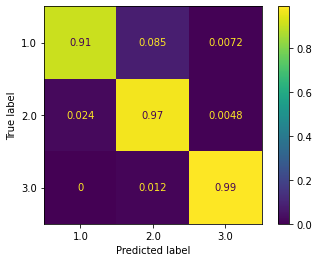

In [ ]:
plot_confusion_matrix(model,X=X_test, y_true=y_test,normalize='true')

In [ ]:
qgrid_widget.get_changed_df()